In [1]:
import geopandas as gpd
districts = gpd.read_file('paris_districts_utm.geojson')
districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


## Is the eiffel tower or a random restaurant in a specified  polygon?

In [25]:
from shapely.geometry import Point #Creates a point object
eiffel_tower = Point(255422.6,6250868.9) 
resto = Point(258904.2000192164 , 6248127.313325831)

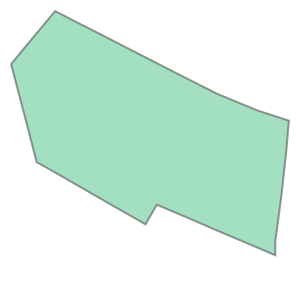

In [26]:
district_montparnasse = districts.loc[52,'geometry'] #access the polygon coordinates
district_montparnasse #Draw the polygon shape

In [27]:
print(f"Is the eiffel tower in the montparnasse district: {eiffel_tower.within(district_montparnasse)}")
print(f"Does the montparnasse district contain the restaurant: {district_montparnasse.contains(resto)}")
print(f"The distance between the restaurant and the eiffel tower is: {eiffel_tower.distance(resto)} meters")

Is the eiffel tower in the montparnasse district: False
Does the montparnasse district contain the restaurant: False
The distance between the restaurant and the eiffel tower is: 4431.459825587062 meters


## Which District contains te eiffel tower?

In [28]:
districts[districts.contains(eiffel_tower)] #if it was there it'd have appeared here.

,id,district_name,population,geometry


## Which restaurant is closer to the eiffel tower?

In [29]:
# Converting the regular x,y columns into geometry
import pandas as pd
restaurants_regular = pd.read_csv('paris_restaurants.csv')
restaurants_geo = gpd.GeoDataFrame(restaurants_regular,geometry = gpd.points_from_xy\
                                   (restaurants_regular.x,restaurants_regular.y))
restaurants_geo.drop( ['x','y'], axis = 1, inplace=True)
restaurants_geo.to_file('restaurants.shp')
restaurants_geo.head()

,type,geometry
0,European restuarant,POINT (259641.692 6251867.063)
1,Traditional French restaurant,POINT (259572.340 6252029.683)
2,Traditional French restaurant,POINT (259657.276 6252143.401)
3,Indian / Middle Eastern restaurant,POINT (259684.438 6252203.137)
4,Traditional French restaurant,POINT (259597.943 6252230.044)


In [32]:
dist_to_eiffel = restaurants_geo.distance(eiffel_tower) #>>> a series of distances between each restaurant and the eiffel tower.
#dist_eiffel.min() ------> 460.697

restaurants_within_1km_to_eiffel_tower = restaurants_geo[restaurants_geo.distance(eiffel_tower) < 1000]
restaurants_within_1km_to_eiffel_tower.head()

,type,geometry
446,Traditional French restaurant,POINT (254647.120 6250868.394)
929,Traditional French restaurant,POINT (255580.868 6251807.836)
1529,European restuarant,POINT (256321.810 6250515.622)
1781,Caribbean restaurant,POINT (256282.737 6250656.898)
1783,European restuarant,POINT (256355.874 6250516.807)


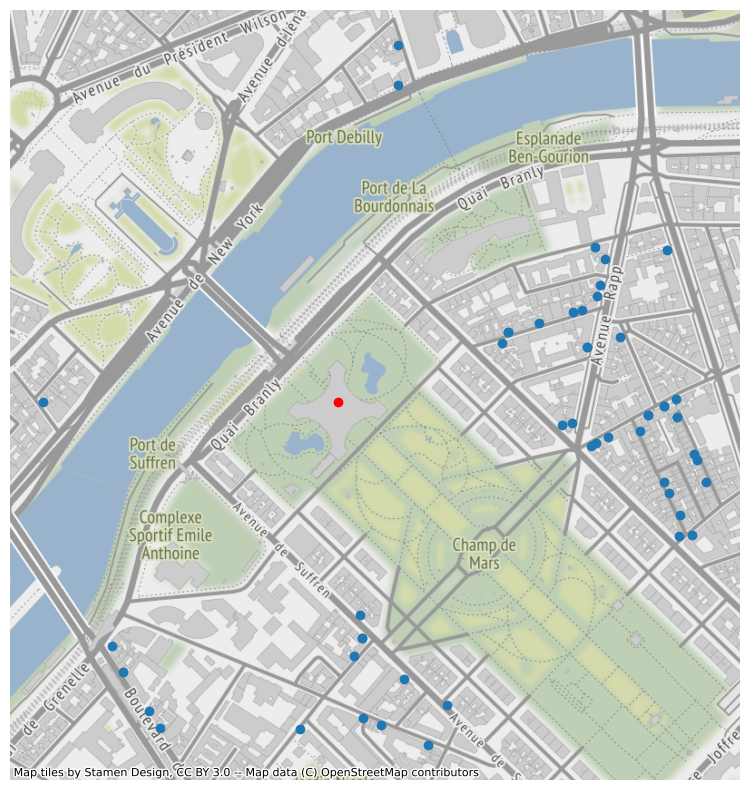

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
restaurants_within_1km_to_eiffel_tower.plot(ax = ax)
gpd.GeoSeries(eiffel_tower).plot(ax = ax , color = 'red') # Where is the eiffel tower located on the map?

import contextily; contextily.add_basemap(ax=ax) # To put a map visual in the background
ax.set_axis_off()
plt.show()

In [41]:
print(districts[districts['district_name'] == "St-Germain-l'Auxerrois"].geometry) #POLYGON ((451922.133 5411438.484, 451922.080 5...
print(districts[districts['district_name'] == "St-Germain-l'Auxerrois"].geometry.squeeze())

0    POLYGON ((451922.133 5411438.484, 451922.080 5...
Name: geometry, dtype: geometry
POLYGON ((451922.13339125237 5411438.484355546, 451922.0804813758 5411438.408692015, 451795.57298275013 5411529.92734109, 451791.7273943643 5411533.7401501145, 451782.8537587611 5411543.364715288, 451728.85695120774 5411615.324405611, 451650.3512651195 5411720.2011527745, 451622.85425172024 5411743.693147404, 451615.86217783 5411749.635890384, 451614.6869041576 5411750.634698503, 451409.4251785956 5411925.257117014, 451340.84721005737 5411947.448758151, 451340.8440112216 5411947.449758902, 451070.26722042554 5412035.054548781, 450850.90816363186 5412123.914600604, 450850.58061141777 5412124.103555858, 450847.0477719638 5412126.037479475, 450844.0725885831 5412127.673402782, 450822.7795982064 5412139.335361804, 450735.4765408599 5412191.589922375, 450734.33516124246 5412192.262311966, 450643.5030519525 5412238.501858044, 450573.0291574787 5412276.056471703, 450573.0240596162 5412276.058872714, 450512.